What's in the data folder?


In [91]:
# grab most recent dataset
# save as VARIANTS and PREVALENCE 
# https://metrotransitmn.shinyapps.io/metc-wastewater-covid-monitor/
#
import os
where_am_I=os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'covid_wastewater_data.ipynb',
 'data',
 'data_source.txt']

In [99]:
c=os.listdir(where_am_I+"/data")
display(c)

['2020-03-28-prevalence Wastewater Treatment COVID-19 Monitoring Dashboard.csv',
 '2020-03-28-variants Wastewater Treatment COVID-19 Monitoring Dashboard.csv',
 'data_source.txt',
 'resaved-2020-03-28-prevalence Wastewater Treatment COVID-19 Monitoring Dashboard.csv']

In [100]:
prevalence_data_file=where_am_I+"/data/"+c[0]
print(prevalence_data_file)
variants_data_file=where_am_I+"/data/"+c[1]
print(variants_data_file)
try2_file=where_am_I+"/data/"+c[3]
print(try2_file)

C:\Users\sj5947pw\Desktop\Covid BA2 prediction\python_version/data/2020-03-28-prevalence Wastewater Treatment COVID-19 Monitoring Dashboard.csv
C:\Users\sj5947pw\Desktop\Covid BA2 prediction\python_version/data/2020-03-28-variants Wastewater Treatment COVID-19 Monitoring Dashboard.csv
C:\Users\sj5947pw\Desktop\Covid BA2 prediction\python_version/data/resaved-2020-03-28-prevalence Wastewater Treatment COVID-19 Monitoring Dashboard.csv


What does the data look like?

In [118]:
import pandas as pd

df = pd.read_csv(try2_file, delimiter=',')

In [146]:
df.iloc[0:2,:]

,Date,"Viral load in wastewater, M copies/person/day",Standard error of viral load,7-day rolling average viral load,Total COVID cases,New COVID cases,COVID cases per capita,7-day rolling average COVID cases per capita
0,2020-11-01,181.44,0.58,203.27,87259.0,1564.0,49.0,40.0
1,2020-11-02,227.50,21.55,203.27,89232.0,1973.0,62.0,44.0


In [148]:
df.iloc[0:2,1]

0    181.44
1    227.50
Name: Viral load in wastewater, M copies/person/day, dtype: float64

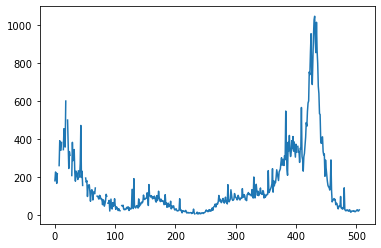

In [149]:
plt.plot(df.iloc[:,1])

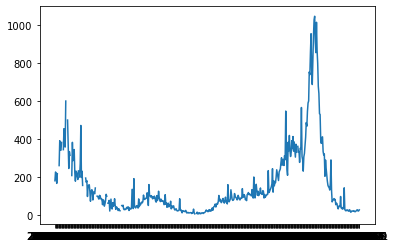

In [151]:
plt.plot(df.iloc[:,0],df.iloc[:,1])

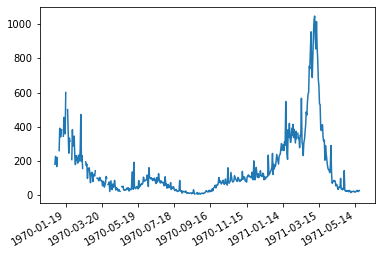

In [154]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.plot(    df.iloc[:,0],df.iloc[:,1])
plt.gcf().autofmt_xdate()
plt.show()

Grab the data via numpy

In [131]:
import numpy
#prev_data = numpy.loadtxt(fname=prevalence_data_file, delimiter=',')
from numpy import genfromtxt
my_data = genfromtxt(
    #dtype=('datetime64[D]',float,float,float,int,int,float,float),
    fname=try2_file,
    skip_header=1,
    delimiter=','
)
print(my_data)

[[       nan 1.8144e+02 5.8000e-01 ... 1.5640e+03 4.9000e+01 4.0000e+01]
 [       nan 2.2750e+02 2.1550e+01 ... 1.9730e+03 6.2000e+01 4.4000e+01]
 [       nan 2.2114e+02 5.4550e+01 ... 0.0000e+00 0.0000e+00 4.0000e+01]
 ...
 [       nan 2.1690e+01 3.6900e+00 ... 0.0000e+00 0.0000e+00 7.0000e+00]
 [       nan 2.3090e+01 1.6400e+00 ... 0.0000e+00 0.0000e+00 7.0000e+00]
 [       nan 2.8120e+01 1.1300e+00 ... 2.3100e+02 7.0000e+00 7.0000e+00]]


In [134]:
my_data[:,1]

array([ 181.44,  227.5 ,  221.14,  167.52,  218.78,     nan,     nan,
        261.3 ,  392.15,  342.42,  342.09,  383.23,     nan,     nan,
        345.28,  455.45,  389.72,  358.79,  601.03,     nan,     nan,
        500.99,  380.12,  246.11,  335.  ,  315.14,     nan,     nan,
        208.95,  383.73,  287.2 ,  334.95,  345.77,  224.55,  179.22,
        232.22,  224.75,  203.81,  188.02,  233.41,     nan,  201.05,
        271.2 ,  472.67,  198.72,  231.85,  156.89,     nan,     nan,
        171.8 ,     nan,  195.69,  173.38,  181.79,   98.58,  151.16,
        158.89,  160.35,  125.56,   73.66,  124.43,  134.18,  131.9 ,
         80.16,  122.37,  119.08,  113.06,  143.35,     nan,     nan,
        100.36,  100.27,   91.06,   84.74,  104.47,  102.72,   89.42,
         82.89,   84.96,   55.58,   81.32,   77.36,   47.69,   59.31,
         76.7 ,  110.08,   99.83,     nan,   63.36,   63.31,   78.23,
         22.07,   52.79,   84.83,   36.06,   33.08,   66.1 ,   47.24,
         54.24,   86

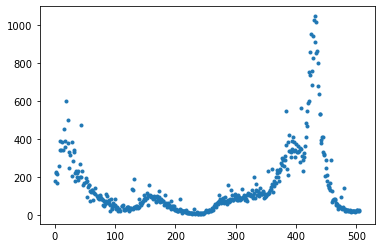

In [143]:
plt.plot(my_data[:,1],'.')